<a href="https://colab.research.google.com/github/uyminhtri2702/AI/blob/main/Face_TRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)


Mounted at /content/drive


In [2]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [3]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [4]:
training_set=train.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Facetest/train',target_size=(150,150), batch_size=40, class_mode='categorical')
validation_set=validation.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Facetest/test',target_size=(150,150), batch_size=40, class_mode='categorical')

Found 42 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


In [5]:
training_set.class_indices

{'Karik': 0, 'tri': 1}

In [6]:
model = Sequential()
model.add(Conv2D(16,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(216,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [7]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',  metrics=['accuracy'])
from keras.callbacks import EarlyStopping
history = model.fit(training_set, epochs = 20, validation_data = validation_set, verbose=1, callbacks=[EarlyStopping(monitor='val_loss', patience=15)])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
2/2 [==============================] - 32s 18s/step - loss: 13.6196 - accuracy: 0.6429 - val_loss: 188.1364 - val_accuracy: 0.6429
Epoch 2/20
2/2 [==============================] - 3s 3s/step - loss: 358.0030 - accuracy: 0.3095 - val_loss: 13.0688 - val_accuracy: 0.6429
Epoch 3/20
2/2 [==============================] - 3s 2s/step - loss: 12.4906 - accuracy: 0.6429 - val_loss: 14.8371 - val_accuracy: 0.6667
Epoch 4/20
2/2 [==============================] - 3s 2s/step - loss: 14.8371 - accuracy: 0.6667 - val_loss: 7.0758 - val_accuracy: 0.6667
Epoch 5/20
2/2 [==============================] - 3s 2s/step - loss: 6.7720 - accuracy: 0.6667 - val_loss: 7.5988 - val_accuracy: 0.3571
Epoch 6/20
2/2 [==============================] - 3s 3s/step - loss: 2.7117 - accuracy: 0.6667 - val_loss: 0.9495 - val_accuracy: 0.4524
Epoch 7/20
2/2 [==============================] - 3s 1s/step - loss: 0.8528 - accuracy: 0.5000 - val_loss: 3.4082 - val_accuracy: 0.6667
Epoch 8/20
2/2 [==============

In [8]:
model.save('Face.h5')
from keras.models import load_model
CNN_Face=load_model('Face.h5')

In [9]:
score = model.evaluate(validation_set,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  0.09346793591976166
Độ chính xác kiểm tra là:  0.976190447807312


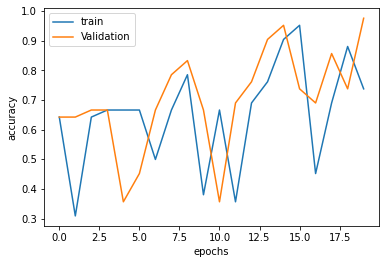

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

Tri


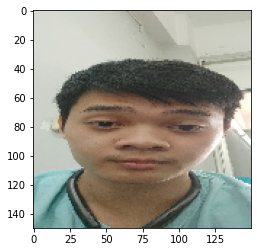

In [11]:
from keras.models import load_model
img_path = '/content/drive/MyDrive/Colab Notebooks/z3430717237059_09f064b12c655cc02e3805e92a448176.jpg'
img=load_img(img_path,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
khuon_mat=np.argmax(CNN_Face.predict(img),axis=1)
pred = model.predict(img)
test=np.argmax(model.predict(img),axis=1)
if(test ==1):
  print('Tri')
elif (test ==0):
  print('Karik')

Karik


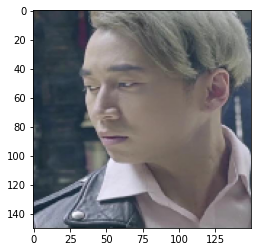

In [12]:
from keras.models import load_model
img_path ='/content/drive/MyDrive/Colab Notebooks/screenshot_1653102585.jpeg'
img=load_img(img_path,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
khuon_mat=np.argmax(CNN_Face.predict(img),axis=1)
pred = model.predict(img)
test=np.argmax(model.predict(img),axis=1)
if(test ==1):
  print('Tri')
elif (test ==0):
  print('Karik')

Karik


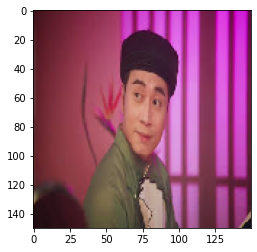

In [14]:
from keras.models import load_model
img_path ='/content/drive/MyDrive/Colab Notebooks/images (1).jpg'
img=load_img(img_path,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
khuon_mat=np.argmax(CNN_Face.predict(img),axis=1)
pred = model.predict(img)
test=np.argmax(model.predict(img),axis=1)
if(test ==1):
  print('Tri')
elif (test ==0):
  print('Karik')

Tri


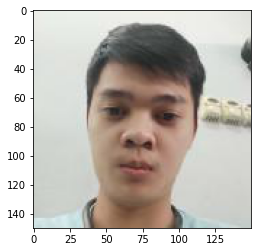

In [15]:

from keras.models import load_model
img_path ='/content/drive/MyDrive/Colab Notebooks/810c1570c3995e056eca260b8702c098.jpg'
img=load_img(img_path,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
khuon_mat=np.argmax(CNN_Face.predict(img),axis=1)
pred = model.predict(img)
test=np.argmax(model.predict(img),axis=1)
if(test ==1):
  print('Tri')
elif (test ==0):
  print('Karik')